# Function as object

1) Inner Function

2) Scope

3) Closure

4) Decorators > The benefits of learning Decorators
https://www.oreilly.com/content/5-reasons-you-need-to-learn-to-write-python-decorators/

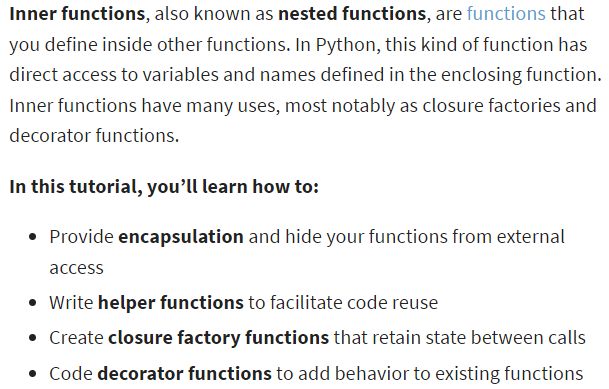

In [11]:
def list_benefits():
    pass

def build_sentence(benefit):
    pass 

def name_the_benefits_functions():
    list_of_benefits = list_benefits()
    for benefit in list_of_benefits():
        print(build_sentence(benefit))
        
name_the_benefits_of_functions()

NameError: name 'name_the_benefits_of_functions' is not defined

In [2]:
# In python, Inner function can access names in the enclosing function.
# https://realpython.com/inner-functions-what-are-they-good-for/

def outer_func():
    def inner_func():
        print("Hello, World!")
    inner_func()
    
outer_func()

Hello, World!


In [3]:
# A common use case of inner functions arises when you need to protect, or 
# hide, a given function from everything happening outside of it so that the
# function is totally hidden from the global scope. This kind of behavior 
# is commonly known as encapsulation.

def increment(number):
    def inner_increment():
        return number + 1
    return inner_increment()

increment(100)

101

In [4]:
inner_increment()

NameError: name 'inner_increment' is not defined

In [5]:
# ^^^In this example, you can’t access inner_increment() directly. If you try 
# to do it, then you get a NameError. That’s because increment() totally 
# hides inner_increment(), preventing you from accessing it from the global 
# scope.

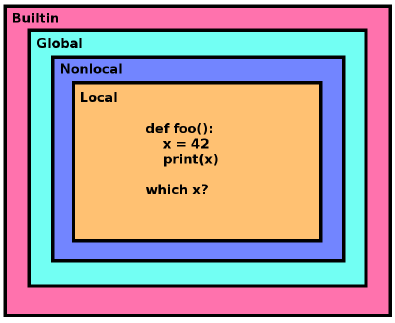

In [61]:
# Global
x = 7

def func():
    global x
    x = 42
    print(x)

func()

42


In [64]:
# Nonlocal
# it is used when you are inside a nested function, and you want to update 
# a variable that is defined inside your parent function.
def func():
    x = 10
    
    def inner():
        nonlocal x
        x = 20
        print(x)
    inner()

func()

20


In [ ]:
# You can also create higher-order functions in Python. 
# Higher-order functions are functions that operate on other functions by 
# taking them as arguments, returning them, or both.





In [12]:
# Closure
# https://www.programiz.com/python-programming/closure

# a closure is Python's way of attaching nonlocal variables to a returned 
# function so that the function can operate even when it is called outside 
# of its parent's scope.


def print_msg(msg):
    # This is the outer enclosing function

    def printer():
        # This is the nested function
        print(msg)

    return printer  # returns the nested function


# Now let's try calling this function.
# Output: Hello
another = print_msg("Hello")
another()

Hello


In [13]:
del print_msg

another()

Hello


In [14]:
print_msg("Hello")

NameError: name 'print_msg' is not defined

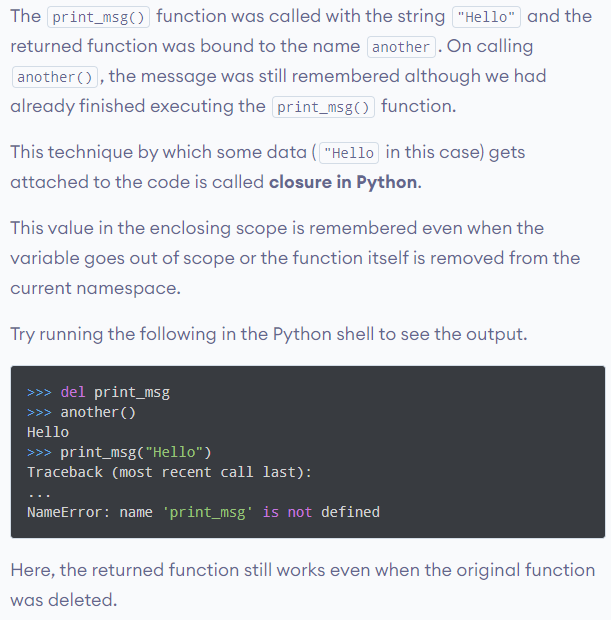

In [15]:
# This technique by which some data ("Hello in this case) gets attached to 
# the code is called closure in Python.

In [16]:
# Higher order functions

def inc(x):
    return x + 1

def dec(x):
    return x - 1

def operate(func, x):
    result =  func(x)
    return result

In [17]:
operate(inc, 3)

4

In [20]:
operate(dec, 8)

7

In [21]:
def is_called():
    def is_returned():
        print("Hello!")
    return is_returned

new =  is_called()
new()

Hello!


# Decorator

In [ ]:
# Decorators modifies the behavior of a function w/o changing code of 
# function itself.

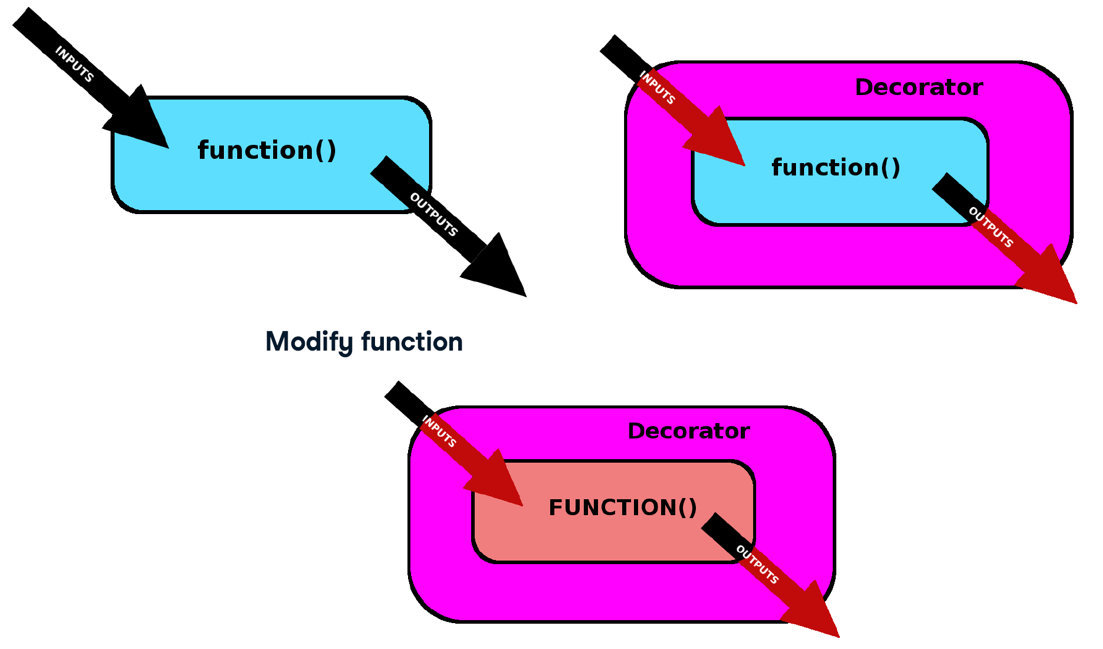

In [22]:
# https://www.programiz.com/python-programming/decorator

def is_called():
    def is_returned():
        print("Hello")
    return is_returned

new = is_called()
new()

Hello


In [27]:
def make_pretty(func):
    def inner():
        print("I got decorated")
        func()
    return inner

def ordinary():
    print("I am ordinary")
    
ordinary()

I am ordinary


In [24]:
# lets decorate this ordinary function

pretty = make_pretty(ordinary)
pretty()

# Note: make_pretty() is a decorator
#  decorator function added some new functionality to the original function. 

I got decorated


In [26]:
# We can use the @ symbol along with the name of the decorator function and 
# place it above the definition of the function to be decorated. 


@make_pretty
def ordinary():
    print("I am ordinary")

# Is equivalent to

def ordinary():
    print("I am ordinary")
ordinary = make_pretty(ordinary)

In [28]:
# Decorating Functions with Parameters

def divide(a, b):
    return a/b

divide(2,5)

0.4

In [53]:
divide(2/0)

ZeroDivisionError: division by zero

In [55]:
# #44 Python Tutorial for Beginners | Decorators
# https://www.youtube.com/watch?v=yNzxXZfkLUA


def div(a,b):
    print (a/b)

#------------------------- Defining Decorator
def smart_div(func):
    
    def inner(a,b):
        if a < b:
            a,b = b,a
        return func(a,b)
    return inner
#--------------------------

div_mod = smart_div(div)

div_mod(2,4)


2.0


In [41]:
# Making a new decorator to address division issue

def smart_divide(func):
    def inner(a,b):
        print("I am going to divide", a, "and", b)
        if b == 0:
            print("Whoops! cannot divide")
            return
        return func(a,b)
    return inner

@smart_divide
def divide(a, b):
    print(a/b)

In [42]:
divide(2,5)

I am going to divide 2 and 5
0.4


In [56]:
divide(3,0)

I am going to divide 3 and 0
Whoops! cannot divide


In [60]:
def smart_divide(func):
    def inner(a,b):
        print("Divide", a, "by", b)
        if b == 0:
            print("Cannot divide by 0!")
            return
        return func(a,b)
    return inner

@smart_divide
def divide(a,b):
    return a / b

value1 = divide(15,5)
print(value1)

value2 = divide(15,0)
print(value2)

Divide 15 by 5
3.0
Divide 15 by 0
Cannot divide by 0!
None


In [44]:
# To deal with a number of parameters


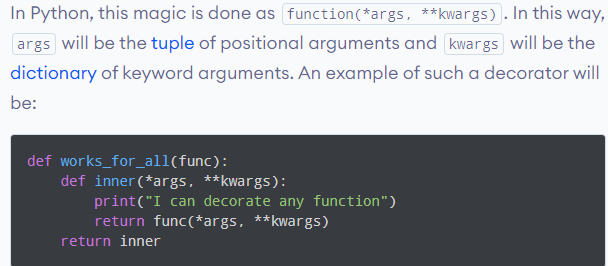

In [49]:
def star(func):
    def inner(*args, **kwargs):
        print("*" * 30)
        func(*args, **kwargs)
        print("*" * 30)
    return inner

In [50]:
def percent(func):
    def inner(*args, **kwargs):
        print("%" *30)
        func(*args, **kwargs)
        print("%" * 30)
    return inner

In [52]:
@star
@percent

def printer(msg):
    print(msg)
printer("Hello")

******************************
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Hello
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
******************************
